<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FirstOrderSystem_RC_forcedAC_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>1st-Order System RC: Forced AC Response</h1></b>

Dr. Bingsen Wang

3/22/2025
</center>

0
0
120
240
360
480
600
720
840
960
1080
0


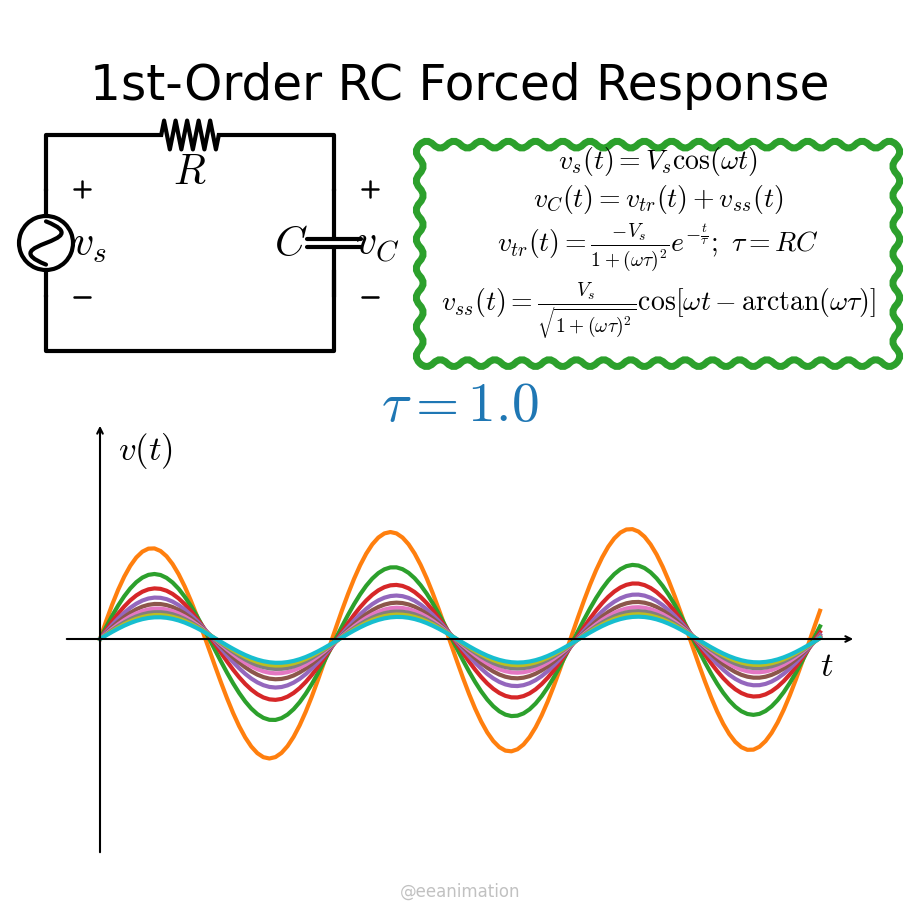

In [56]:
from matplotlib import pyplot,patches,cm,transforms,path,animation
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

#draw resistor symbol
def draw_resistor(ax,x0,y0,n,w,h,theta=0,lw=1,c='k',alpha=1):
    verts = [(x0,y0)]+[(x0+(.5*k+.25)*w/n,y0+(-1)**k*h) for k in range(2*n)]+[(x0+w,y0)]
    codes = [path.Path.MOVETO]+[path.Path.LINETO]*(2*n+1)
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',joinstyle='round',transform=rot))
    return
#draw capacitor symbol
def draw_capacitor(ax,x0,y0,h,theta=0,lw=1,c='k',alpha=1):
    dx,dy = (.075*h, .25*h)
    verts = [(x0,y0),(x0+h/2-dx/2,y0),(x0+h/2-dx/2,y0+dy),(x0+h/2-dx/2,y0-dy),
             (x0+h,y0),(x0+h/2+dx/2,y0),(x0+h/2+dx/2,y0+dy),(x0+h/2+dx/2,y0-dy)]
    codes = [path.Path.MOVETO,path.Path.LINETO]*4
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return
#draw ac voltage source symbol
def draw_voltage_source_ac(ax,x0,y0,h,theta=0,lw=1,color='k',alpha=1):
    verts = [(x0,y0),(x0+.25*h,y0),(x0+.75*h,y0),(x0+h,y0),(x0+.3*h,y0),(x0+.5*h,y0+.5*h),(x0+.5*h,y0-.5*h),(x0+.7*h,y0)]
    verts += list(path.Path.arc(0,360).vertices*.25*h+np.array([x0+.5*h,y0]))
    codes = [path.Path.MOVETO,path.Path.LINETO]*2 + [path.Path.MOVETO]+[path.Path.CURVE4]*3 + list(path.Path.arc(0,360).codes)
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return
xy=[-1.15,.6]
xy1=(-1,-.5)
x1=.55
h,w=.6,.8
wr,wc=.16,.3
tau=np.linspace(1,10,10)
t=np.linspace(0,10,120)
omega=3*2*np.pi/max(t)
vC_tr=[-1/(1+(omega*tau[k])**2)*np.exp(-t/tau[k]) for k in range(len(tau))]
vC_ss=[1/np.sqrt(1+(omega*tau[k])**2)*np.cos(omega*t-np.arctan(omega*tau[k])) for k in range(len(tau))]
vt=[vC_tr[k]+vC_ss[k] for k in range(len(tau))]
cl = list(cm.tab10.colors) #color list
fig = pyplot.figure(figsize=([9,9]))
ax= fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25]); ax.axis('off')
ax.text(0,1,'1st-Order RC Forced Response',size=35,ha='center')
draw_capacitor(ax,xy[0]+w,xy[1]-wc/2,wc,theta=90,lw=3)
draw_voltage_source_ac(ax,xy[0],xy[1]+wc/2,wc,theta=-90,lw=3)
draw_resistor(ax,xy[0]+(w-wr)/2,xy[1]+h/2,5,wr,wr/4,lw=3)
ax.plot(xy[0]+np.array([0,0,w,w]),xy[1]-np.array([wc,h,h,wr])/2,c='k',lw=3)
[ax.plot(xy[0]+w/2+[-1,1][k]*np.array([w,w,wr])/2,xy[1]+np.array([wc,h,h])/2,c='k',lw=3) for k in range(2)]
[ax.scatter(xy[0]+[.1,w+.1][i],xy[1]+wc/2*(-1)**k,s=150,marker=['$+$','$-$'][k],c='k') for k in range(2) for i in range(2)]
[ax.text(xy[0]+[.12,w/2,w-.12,w+.12][k],xy[1]+[0,h/2-.1,0,0][k],['$v_s$','$R$','$C$','$v_C$'][k],size=30,ha='center',va='center') for k in range(4)]
ax.annotate('',(xy1[0]+2.1,xy1[1]),(xy1[0]-.1,xy1[1]),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1.5})
ax.annotate('',(xy1[0],xy1[1]+.6),(xy1[0],xy1[1]-.6),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1.5})
[ax.text(xy1[0]+[2,.05][k],xy1[1]+[-.1,.5][k],['$t$','$v(t)$'][k],size=25) for k in range(2)]
ax.text(x1,xy[1],r'$v_s(t)=V_s\cos(\omega t)$'+'\n'+
        r'$v_C(t)=v_{tr}(t)+v_{ss}(t)$'+'\n'+
        r'$v_{tr}(t)=\frac{-V_s}{1+(\omega\tau)^2}e^{-\frac{t}{\tau}};\ \tau=RC$'+'\n'+
        r'$v_{ss}(t)=\frac{V_s}{\sqrt{1+(\omega\tau)^2}}\cos[\omega t-\arctan(\omega\tau)]$',
        size=20,ha='center',va='center',multialignment='center',
        bbox=dict(boxstyle='roundtooth',pad=1,facecolor='w',edgecolor=cl[2],lw=5))
txt_tau=ax.text(0,xy1[1]+.65,'',size=40,ha='center',va='center')
lines = [ax.plot([],[],lw=3,c=cl[k])[0] for k in range(len(tau))]

def animate(ii):
  # ii=len(t)-1
  i=ii%len(t);k=ii//len(t)
  if i==0:
    print(ii)
    txt_tau.set_text(r'$\tau='+str(tau[k])+'$')
    txt_tau.set_color(cl[k])
  lines[k].set_data(xy1[0]+t[:i+1]/max(t)*2,xy1[1]+1.2*vt[k][:i+1])
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=len(tau)*len(t), interval=50)
anim.save("RCforcedAC.mp4",writer=animation.FFMpegWriter(fps=80),dpi=200)